#Lab3 Exercises - Bernardo Pagetti Meyer#

In [1]:
#Import Modules used in this lab

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset digits
digits = datasets.load_digits()

In [2]:
#creating the arrays from the dataset

X = digits.data
y = digits.target

#Splitting the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
#Select number of nenighbors to use
kNN = KNeighborsClassifier(n_neighbors=3)

kNN.fit(X_train, y_train)
kNN.score(X_test, y_test)

0.9916666666666667

In [4]:
#run for loop to "try" different number of neighbors and store the accuracy
testscore = []
trainscore = []
nneighbors = [1,2,3,4,5,6,7,8]
for i in range(1,9):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    testscore.append(kNN.score(X_test, y_test))
    trainscore.append(kNN.score(X_train, y_train))


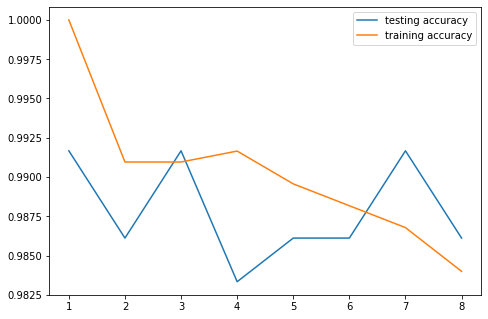

In [5]:

#plot the accuracy score on the graph

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(nneighbors, testscore, label="testing accuracy")
ax.plot(nneighbors, trainscore, label="training accuracy")
ax.legend()



According to the Graphic, we can see that 3 nearest neighbors is the best number to obtain better accuracy.

In [6]:
#Store accuracy result using 3 neighbors -> best results
classifiers_accuracy = [["KNN", trainscore[2]]]
classifiers_accuracy

[['KNN', 0.9909533750869868]]

In [7]:
#Support Vector Machine - Linear Kernel

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Linear Kernel","\n", classification_report(y_test, y_pred))

Linear Kernel 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.88      1.00      0.94        29
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00        37
           4       0.97      0.97      0.97        40
           5       0.97      1.00      0.98        32
           6       0.97      0.97      0.97        34
           7       0.97      1.00      0.99        33
           8       0.97      0.85      0.91        40
           9       0.97      0.92      0.94        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [8]:
#Support Vector Machine - Poly Kernel

svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Sigmoid Kernel","\n", classification_report(y_test, y_pred))

Sigmoid Kernel 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.66      0.72      0.69        29
           2       1.00      0.92      0.96        37
           3       1.00      0.89      0.94        37
           4       0.95      0.95      0.95        40
           5       0.94      1.00      0.97        32
           6       0.89      0.94      0.91        34
           7       0.80      0.97      0.88        33
           8       0.91      0.75      0.82        40
           9       0.89      0.84      0.86        37

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.89       360
weighted avg       0.90      0.90      0.90       360



In [9]:
#Support Vector Machine - Rbf Kernel

svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Poly Kernel","\n", classification_report(y_test, y_pred))

Poly Kernel 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        32
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        33
           8       0.97      0.95      0.96        40
           9       1.00      0.97      0.99        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



From these Kernels we should use poly as it outputs the highest accuracy.

In [10]:
#store accuracy from poly

classifiers_accuracy.append(['SVM - poly kernel', svm.score(X_test, y_test)])
classifiers_accuracy

[['KNN', 0.9909533750869868], ['SVM - poly kernel', 0.9916666666666667]]

In [11]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
confM = confusion_matrix(y_test, y_pred)


In [12]:
#Store accuracy from Naive Bayes classifier
classifiers_accuracy.append(["Naive Bayes", bayes.score(X_train, y_train)])

[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted')]

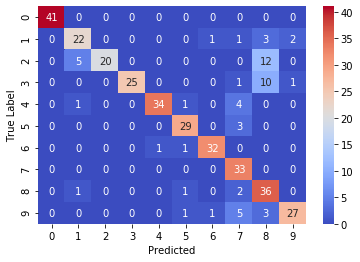

In [13]:
#plot Heatmap
graph = sns.heatmap(confM, cmap='coolwarm', annot=True)
graph.set(xlabel='Predicted', ylabel='True Label')

In [14]:
##Way to print number of correct guesses - Just for learning purposes
print("Correct Predictions out of total %d samples : %d" % (X_test.shape[0], (y_test == y_pred).sum()))

Correct Predictions out of total 360 samples : 299


In [15]:
classifiers_accuracy

[['KNN', 0.9909533750869868],
 ['SVM - poly kernel', 0.9916666666666667],
 ['Naive Bayes', 0.8649965205288797]]

In [16]:
df =  pd.DataFrame(classifiers_accuracy, columns=['Classifier', 'Accuracy'])
  

In [17]:
df

,Classifier,Accuracy
0,KNN,0.990953
1,SVM - poly kernel,0.991667
2,Naive Bayes,0.864997


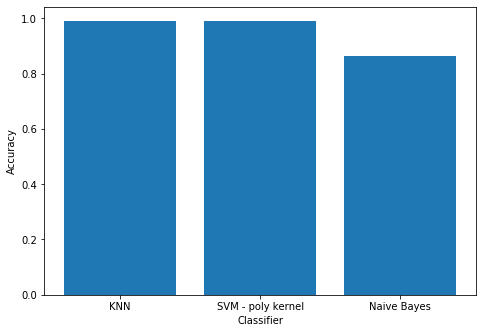

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df['Classifier'],df['Accuracy'])
ax.set(xlabel='Classifier', ylabel='Accuracy')
plt.show()

# Part II - Regression

In [19]:
# 1. Linear Regression

#import Gapminder data

dfgm = pd.read_csv('gapminder.csv')
dfgm

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


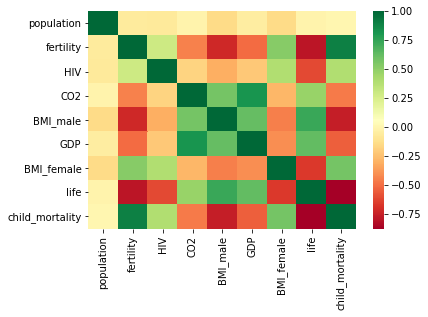

In [20]:
#Visualise correlation of data in Gapmider using Seaborn

graphgm = sns.heatmap(dfgm.corr(), cmap='RdYlGn', annot=False)

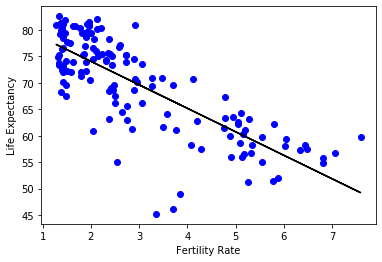

In [90]:
#Linear Regression using "Fertility" attribute to predict life expectancy

x = dfgm['fertility']
y = dfgm['life']

regression = LinearRegression()
regression.fit(x[:, None], y)

#plot the regression

fig,ax = plt.subplots()
ax.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')
ax.set_xlabel('Fertility Rate')
ax.set_ylabel('Life Expectancy')
plt.show()




In [55]:
regression line with all features
#list column names from DF (removed population, life expectancy, and Region Columns)
colnames = list(dfgm.columns)
colnames.remove('population')
colnames.remove('life')
colnames.remove('Region')

X = dfgm[colnames]
Y = dfgm['life']

regression = LinearRegression()
regression.fit(X, Y)
regression.score(X,Y)

#Answer:
# This model score is much better when using all the features - 0.8974995317332959 in comparison with the score when using only one feature.

0.8974995317332959

In [56]:
#Cross validation for the 2 dimensional data
cross_val_score(regression, x[:, None], y, cv=5)

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [57]:
#Cross validation using all the features dimensional data
cross_val_score(regression, X, Y, cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

# Answer:
We can see the cross validation results are much higher on the one using all the features

In [60]:
# 2. Logistic Regression

dfCard = pd.read_csv('creditcard.csv')
dfCard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [66]:
#Attribute to frauds when Class == 1 and non_frauds when Class == 0

frauds = dfCard.loc[dfCard['Class'] == 1]
non_frauds = dfCard.loc[dfCard['Class'] == 0]
print("Number of Frauds:", len(frauds), "/ Number of Legitimate Transactions:", len(non_frauds),)

Number of Frauds: 492 / Number of Legitimate Transactions: 284315


/Users/bernardo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


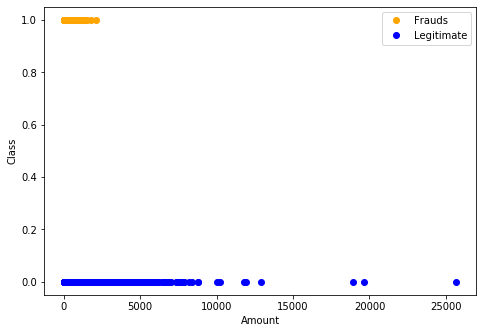

In [92]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
ax.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label="Legitimate")

ax.set_xlabel('Amount')
ax.set_ylabel('Class')
ax.legend()

In [79]:
#Logistic regression
x = dfCard.drop('Class', axis=1)
y = dfCard.Class

log_regression = LogisticRegression()
log_regression.fit(x, y)
y_pred = log_regression.predict(x)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)


[[284157    158]
 [   153    339]]


/Users/bernardo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


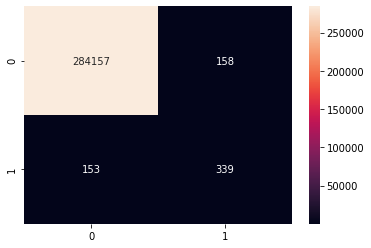

In [86]:
sns.heatmap(conf_matrix, annot=True, fmt="g")